**Aplicação de técnicas de classificação de texto na arquitetura de Chatbots hierárquicos**

**Mestrado Profissional em Computação Aplicada - PPCA - Universidade de Brasília**

**Disciplina**: Mineração de Dados

**Orientador**: Prof. Dr. Marcelo Ladeira <mladeira@unb.br>

**Alunos**: 
 - José Ronaldo Agra De Souza Filho <jose.agra@aluno.unb.br>
 - Bruno Gomes Resende <bruno.resende@aluno.unb.br>
 - Célio Castro Wermelinger <celio.wermelinger@aluno.unb.br> 

**Palavras-Chave:**

Chatbot; Text Classification; Machine Learning; Text Mining; NLP;

In [1]:
# Install packages
# Note: use Python 3.8 env
#!pip install --pre pycaret

In [2]:
# Import packages
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from pycaret.classification import *
import pandas as pd

# download das stopwords para o idioma português
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Montagem de datasets
df_covid = pd.read_csv('data/exemplos-treinamento-covid.csv', delimiter=';')
df_seloturismo = pd.read_csv('data/exemplos-treinamento-seloturismo.csv', delimiter=';')
df_tuberculose = pd.read_csv('data/exemplos-treinamento-tuberculose.csv', delimiter=';')
df_all = pd.concat([df_covid, df_seloturismo, df_tuberculose], axis=0)
df_all.describe()

,input,category
count,1042,1042
unique,1041,3
top,qual a vantagem de usar o selo,seloturismo
freq,2,639


In [4]:
stop_words = stopwords.words('portuguese')

# Vetorização das palavras
cv = CountVectorizer(lowercase=True, stop_words=stop_words, strip_accents='unicode', token_pattern="[A-Za-z]+")
BoW = cv.fit_transform(df_all['input'])
BoW_df = pd.DataFrame(BoW.toarray(), columns=cv.get_feature_names())
BoW_df['target_cat'] = df_all.reset_index().category.map({'covid':0, 'seloturismo':1, 'tuberculose':2})
BoW_df

,abdomen,abracar,abraco,acesso,acho,acionar,acometer,acometidos,acompanhamento,acontece,...,virilha,virus,visitar,visivel,vistoria,vistorias,vivo,voltar,vou,target_cat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1038,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [5]:
# Setup
# Iniciando os recursos da biblioteca, passando como alvo a coluna 'class' do dataset
setup = setup(data=BoW_df, target='target_cat', session_id=20221, train_size = 0.7, fold=10)

,Description,Value
0,Session id,20221
1,Target,target_cat
2,Target type,Multiclass
3,Original data shape,"(1042, 1047)"
4,Transformed data shape,"(1042, 872)"
5,Transformed train set shape,"(729, 872)"
6,Transformed test set shape,"(313, 872)"
7,Numeric features,1046
8,Preprocess,True
9,Imputation type,simple


In [6]:
# Gerando modelos com diferentes abordagens e escolhendo o melhor por cross-validation
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9767,0.0000,0.9767,0.9775,0.9762,0.9564,0.9574,0.0370
et,Extra Trees Classifier,0.9739,0.9986,0.9739,0.9751,0.9735,0.9511,0.9524,0.0900
ridge,Ridge Classifier,0.9698,0.0000,0.9698,0.9712,0.9693,0.9432,0.9449,0.0390
dt,Decision Tree Classifier,0.9643,0.9558,0.9643,0.9658,0.9635,0.9328,0.9348,0.0500
rf,Random Forest Classifier,0.9616,0.9987,0.9616,0.9640,0.9605,0.9271,0.9300,0.1070
gbc,Gradient Boosting Classifier,0.9616,0.9924,0.9616,0.9637,0.9606,0.9273,0.9300,0.3770
lr,Logistic Regression,0.9602,0.9993,0.9602,0.9628,0.9591,0.9246,0.9276,0.3710
nb,Naive Bayes,0.9479,0.9716,0.9479,0.9565,0.9485,0.9057,0.9089,0.0500
ada,Ada Boost Classifier,0.9396,0.9762,0.9396,0.9450,0.9357,0.8833,0.8905,0.1100
lda,Linear Discriminant Analysis,0.9369,0.9636,0.9369,0.9438,0.9367,0.8842,0.8886,0.0800


In [7]:
# Imprimindo melhor modelo
print(modelos)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=20221, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.0000,0.9589,0.9608,0.9562,0.9223,0.9250
1,0.9726,0.0000,0.9726,0.9738,0.9724,0.9484,0.9497
2,0.9726,0.0000,0.9726,0.9738,0.9720,0.9486,0.9501
3,0.9726,0.0000,0.9726,0.9729,0.9725,0.9491,0.9494
4,0.9726,0.0000,0.9726,0.9738,0.9724,0.9484,0.9497
5,0.9726,0.0000,0.9726,0.9729,0.9725,0.9491,0.9494
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9726,0.0000,0.9726,0.9738,0.9724,0.9497,0.9509
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


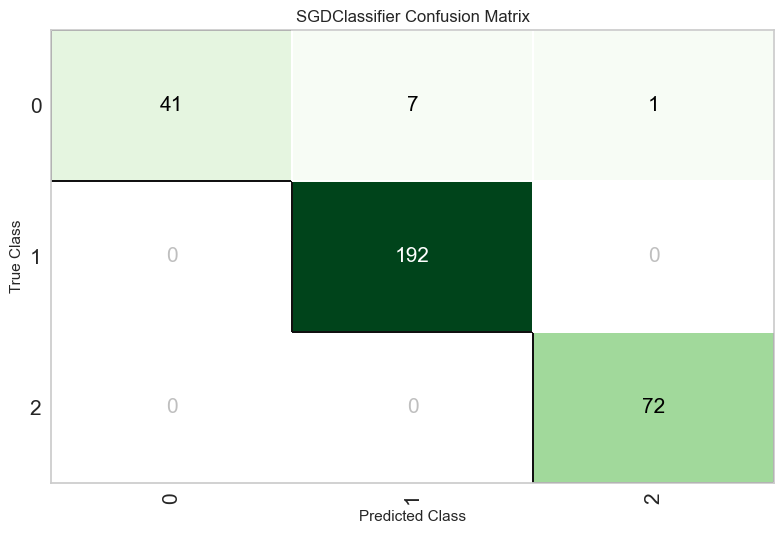

In [8]:
# Matriz de confusão Bag-Of_Words
svm = create_model('svm')
plot_model(svm, 'confusion_matrix')

## Predição

In [9]:
# Realizando predição com dateset de validação
predict_model(svm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9744,0,0.9744,0.9753,0.9735,0.9523,0.9535


,abraco,acesso,acho,acionar,acompanhamento,acontece,acontecera,acordo,acrescimo,acrescimos,...,vir,virus,visitar,visivel,vistoria,vistorias,voltar,vou,target_cat,Label
729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [10]:
# Realizando predição com dateset inteiro
predictions = predict_model(svm, data=BoW_df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9923,0,0.9923,0.9924,0.9922,0.9859,0.9860


,abraco,acesso,acho,acionar,acompanhamento,acontece,acontecera,acordo,acrescimo,acrescimos,...,vir,virus,visitar,visivel,vistoria,vistorias,voltar,vou,target_cat,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [11]:
# Treinando o melhor modelo com Bagging e Boosting e escolhendo o melhor método entre estes 
# Caso a performance do modelo treinado seja inferior ao melhor modelo original, este é retornado
best_ensembled = ensemble_model(svm, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9726,0.9932,0.9726,0.9738,0.9715,0.9483,0.9500
1,0.9726,0.9927,0.9726,0.9738,0.9724,0.9484,0.9497
2,0.9726,0.9636,0.9726,0.9738,0.9720,0.9486,0.9501
3,0.9726,0.9998,0.9726,0.9729,0.9725,0.9491,0.9494
4,0.9452,0.9925,0.9452,0.9497,0.9429,0.8944,0.8998
5,0.9589,0.9747,0.9589,0.9587,0.9580,0.9227,0.9239
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9863,0.9998,0.9863,0.9866,0.9862,0.9751,0.9755
8,0.9726,1.0000,0.9726,0.9738,0.9724,0.9497,0.9509


Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


In [12]:
predict_model(best_ensembled)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9744,0,0.9744,0.9753,0.9735,0.9523,0.9535


,abraco,acesso,acho,acionar,acompanhamento,acontece,acontecera,acordo,acrescimo,acrescimos,...,vir,virus,visitar,visivel,vistoria,vistorias,voltar,vou,target_cat,Label
729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [13]:
modelo_final = finalize_model(best_ensembled)

# Salvando o modelo
save_model(modelo_final, 'models/20220913-modelo-final-multiclasses-bow-svm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\bruno\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['abdomen', 'abracar', 'abraco',
                                              'acesso', 'acho', 'acionar',
                                              'acometer', 'acometidos',
                                              'acompanhamento', 'acontece',
                                              'acontecera', 'acordo', 'acougue',
                                              'acrescido', 'acrescimo',
                                              'acrescimos', 'aderi', 'aderir',
                                              'aderiram', 'ad...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.001,
                                fit_intercept=True, l1_ratio=0.15,
          